# Downloading Compatible Libraries

In [1]:
!python --version

Python 3.10.14


In [2]:
# !pip install tensorflow_hub==0.16.1
# !pip install tf-keras

In [3]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 67.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing ins

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

2024-11-04 10:26:22.033147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 10:26:22.033221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 10:26:22.035069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
tf.__version__

'2.15.1'

In [7]:
# Check if GPU is available
devices = tf.config.list_physical_devices()
if devices:
    print(f"Available Devices: {devices}")
else:
    print("No GPU available.")

Available Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Importing Libararies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset, EDA, Preprocessing and Feature Engineering

In [9]:
news_data = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv', index_col=0)

In [10]:
news_data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [12]:
news_data.describe(include='object')

,title,text
count,71576,72095
unique,62347,62718
top,Factbox: Trump fills top jobs for his administ...,
freq,14,738


In [13]:
news_data.isna().sum()

title    558
text      39
label      0
dtype: int64

In [14]:
news_data[news_data['title'].isna()]

,title,text,label
1,NaN,Did they post their votes for Hillary already?,1
43,NaN,True. Hillary needs a distraction and what bet...,1
162,NaN,All eyes on Electoral delegates. The People kn...,1
185,NaN,Cool,1
269,NaN,A leading US senator: US Supporting War in Syr...,1
...,...,...,...
71484,NaN,Another Arab supremacist masturbation fantasy....,1
71521,NaN,I'm sure they drastically changed accounting m...,1
71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1
71570,NaN,Ever since the powers to be assassinated JFK A...,1


In [15]:
news_data[news_data['text'].isna()]

,title,text,label
2457,Après le succès de « Mariés au premier regard ...,NaN,1
3534,Elections US : les premières estimations donne...,NaN,1
3709,110% des Américains assurent qu’ils continuero...,NaN,1
5612,Des millions d’Américains recherchent massivem...,NaN,1
6270,Vladimir Poutine est élu 45e Président des Eta...,NaN,1
6997,Les Américains ne sont plus qu’à quelques heur...,NaN,1
7083,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
8974,Live Soirée présidentielle US 2016 >> Le Gorafi,NaN,1
16717,Ne supportant plus l’ambiance de la campagne é...,NaN,1
17781,Débat Primaire de la Droite : les Français pas...,NaN,1


In [16]:
news_data['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

<Axes: xlabel='label'>

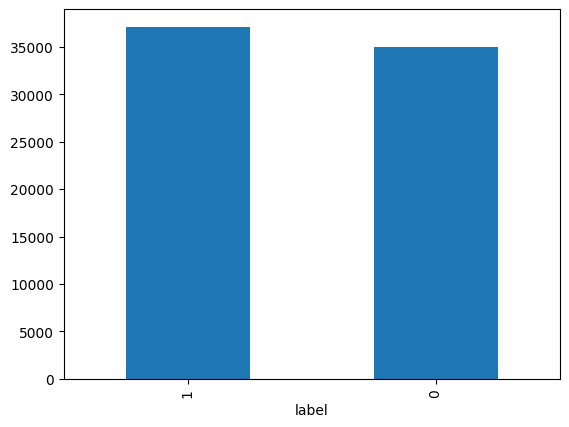

In [17]:
news_data['label'].value_counts().plot(kind='bar')

In [18]:
# news_data['title'] = news_data['title'].astype('string')
# news_data['text'] = news_data['text'].astype('string')

In [19]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [20]:
news_data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [21]:
news_data.isna().sum()

title    558
text      39
label      0
dtype: int64

In [22]:
news_data.dropna(inplace=True)

In [23]:
news_data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [24]:
news_data['text_len'] = news_data['text'].apply(len)

In [25]:
news_data.head()

,title,text,label,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530


In [26]:
news_data['title_len'] = news_data['title'].apply(len)

In [27]:
news_data.head()

,title,text,label,text_len,title_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='title_len', ylabel='Count'>

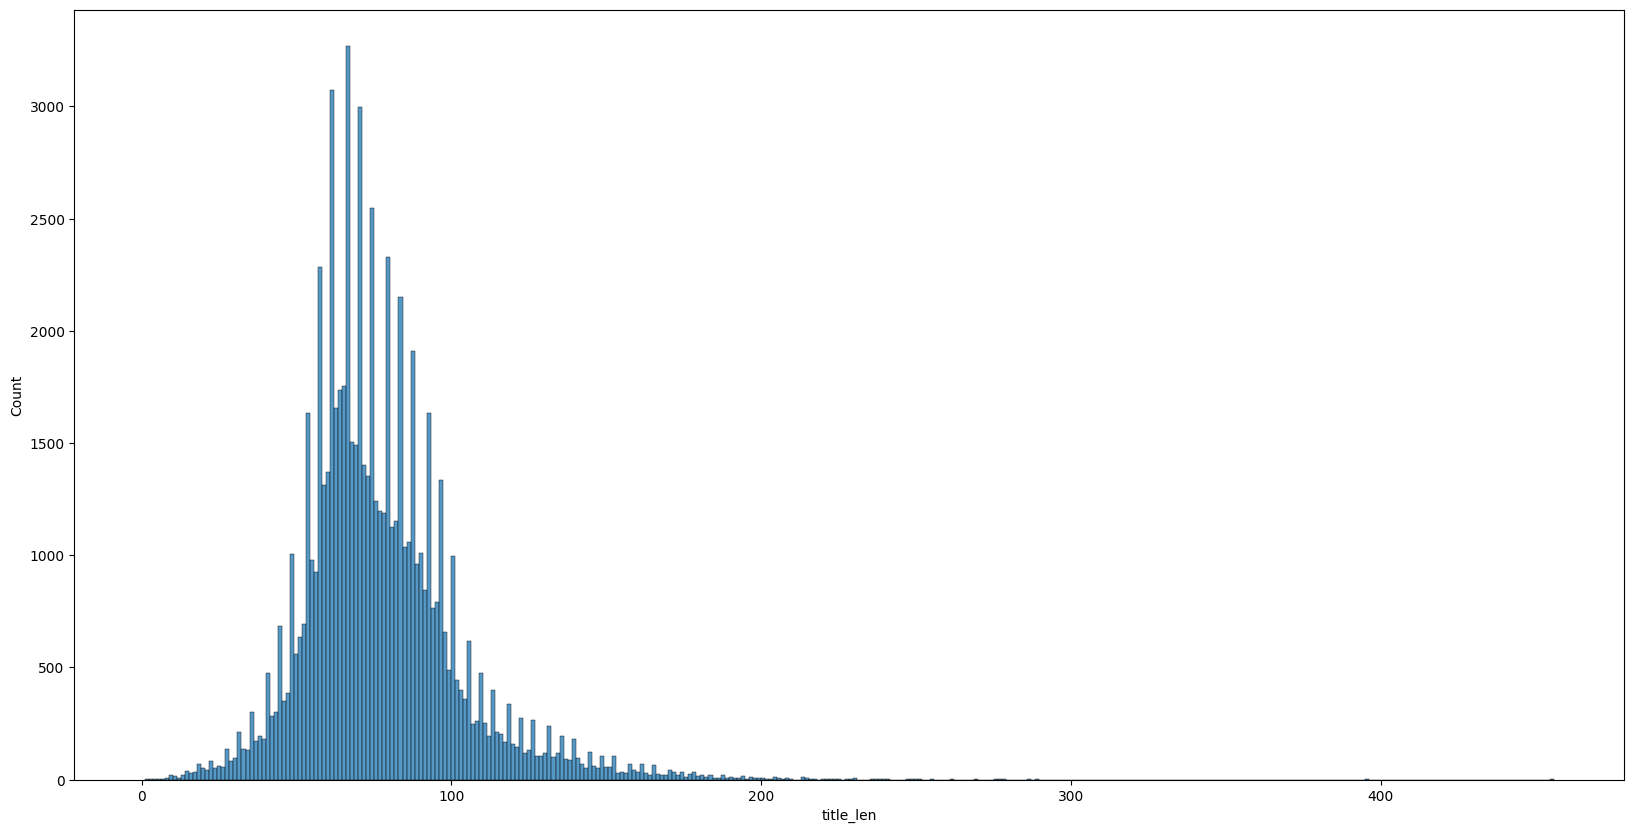

In [28]:
plt.figure(figsize=(20, 10))
sns.histplot(data=news_data, x='title_len')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='text_len', ylabel='Count'>

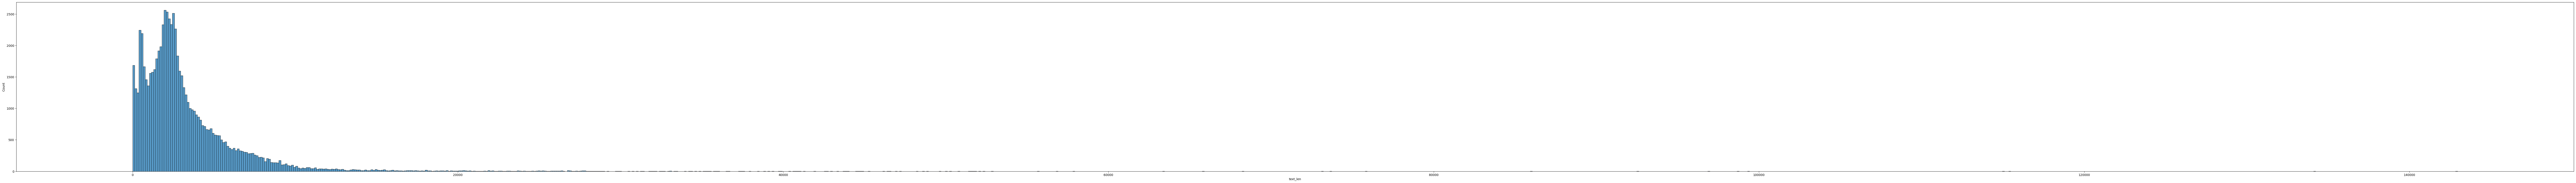

In [29]:
plt.figure(figsize=(150, 10))
sns.histplot(news_data['text_len'])

In [30]:
news_data['text_len'].sort_values(ascending=False)

6445     142961
327      134206
34523    115372
54433    115372
17557    115010
          ...  
36555         1
36533         1
54941         1
8231          1
49715         1
Name: text_len, Length: 71537, dtype: int64

In [31]:
news_data['title_len'].sort_values(ascending=False)

37207    456
44714    396
29935    289
71215    289
17630    286
        ... 
66145      5
27330      4
6367       4
31328      3
38051      1
Name: title_len, Length: 71537, dtype: int64

In [32]:
news_data[(news_data['text_len'] < 40)]

,title,text,label,text_len,title_len
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,1,79
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1,1,68
325,Ohio State University Student Says Terrorist A...,,1,1,99
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1,1,114
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1,1,85
...,...,...,...,...,...
71830,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,1,35,171
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1,1,86
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1,1,78
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1,1,63


In [33]:
news_data['label'].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [34]:
news_data[news_data['title_len'] < 10]

,title,text,label,text_len,title_len
6367,Wow!,http://www.thepoliticalinsider.com/wikileaks-c...,1,1214,4
11496,Tweetwave,This time it's true no pantsTweetwave More Of ...,1,27540,9
20251,Wikileaks,"Whales, elephants of the deep with fins the si...",1,1046,9
27330,EPIC,It didn’t take us long to think of a word to d...,1,2120,4
28323,Rick Rule,"97925 Views October 29, 2016 BROADCAST King Wo...",1,3959,9
29205,What If….,"all 30,000 of the “missing” Hillary emails are...",1,6071,9
31220,Ooh Fuck,Wednesday 9 November 2016 by Lucas Wilde Ooh F...,1,1323,8
31328,Rum,RIGHT REVERAND POPE JEREMIAH GOLDSTIEN says: \...,1,422,3
33356,What Now?,by Thomas Sowell \nThe good news is that we do...,1,4709,9
34341,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,1,578,8


In [35]:
news_data[news_data['text'].str.contains('Car')]

,title,text,label,text_len,title_len
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0,1655,64
18,MAJOR LIBERAL RAG RELUCTANTLY PUBLISHES Articl...,"The Atlantic, a publication that wouldn t know...",1,7181,159
28,Senators Propose Giving States Option to Keep ...,WASHINGTON — Several Republican senators on...,0,5361,86
33,"Schaeuble to head German parliament, unblockin...",BERLIN (Reuters) - Germany took a first decisi...,0,4438,63
...,...,...,...,...,...
72051,A standard dejection in the IRS help line,"By midmorning, the line of taxpayers outside t...",0,9341,41
72070,The “American Conservative Movement” Has Ended...,Here's something interesting from The Unz Revi...,1,14145,75
72082,SAY WHAT? Obama Gives Go Ahead For New UN “Reg...,"If seven years ago, someone told Americans tha...",1,7825,120
72121,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,1,2446,62


In [36]:
news_data

,title,text,label,text_len,title_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78
...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,4788,65
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,3634,79
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,2864,57
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,3374,67


In [37]:
news_data['combined_text_title'] = news_data['title'] + ' ' + news_data['text']

In [38]:
news_data.head()

,title,text,label,text_len,title_len,combined_text_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78,About Time! Christian Group Sues Amazon and SP...


In [39]:
news_data['combined_text_title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:3

In [40]:
news_data['word_count'] = news_data['combined_text_title'].apply(lambda x: len(x.split()))

In [41]:
news_data['word_count'].sort_values(ascending=False)

327      24243
34523    20904
54433    20904
6445     20884
17557    20100
         ...  
52702        2
26286        2
8909         2
42774        2
35093        2
Name: word_count, Length: 71537, dtype: int64

In [42]:
news_data['word_count'].max()

24243

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


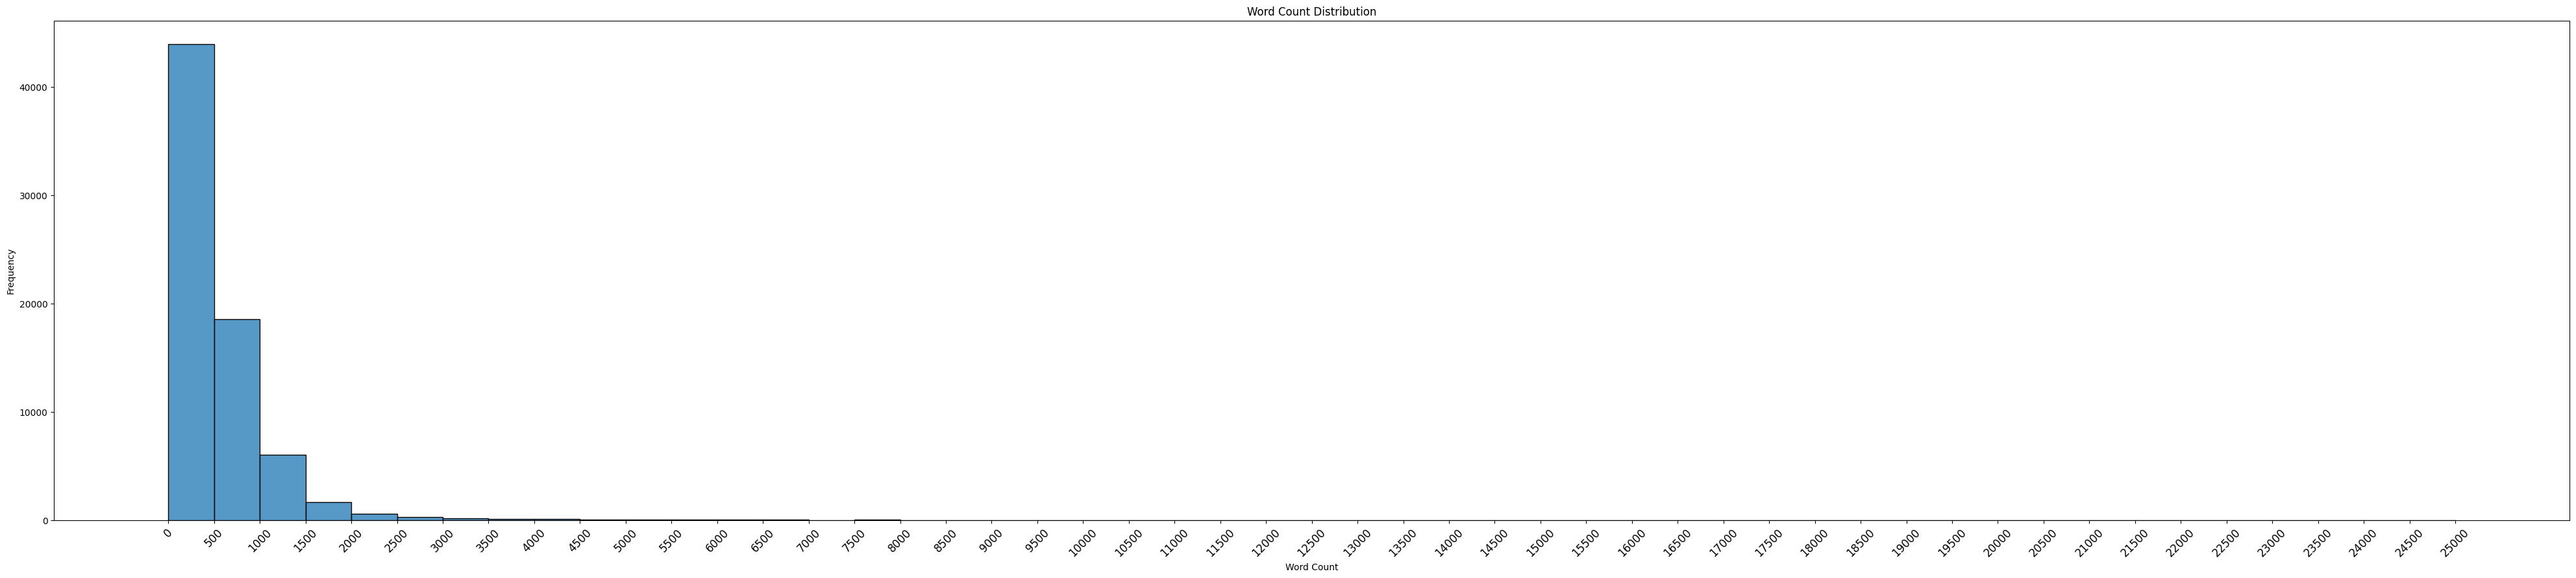

In [43]:
# Set up a large figure size for better readability
plt.figure(figsize=(50, 10))

# Define bins with an interval of 1000 based on the range of data
max_word_count = news_data['word_count'].max()
bins = list(range(0, max_word_count + 1000, 500))

# Plot the histogram with custom bins
sns.histplot(news_data['word_count'], bins=bins)

# Customize x-axis ticks to show every 1000 interval
plt.xticks(ticks=bins, rotation=45, fontsize=12)

# Add labels for clarity
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count Distribution")

# Show the plot
plt.show()

In [44]:
news_data['word_count'].value_counts().nlargest(10)

word_count
406    163
413    162
415    157
419    154
412    152
418    148
411    145
402    144
414    142
376    142
Name: count, dtype: int64

In [45]:
news_data.reset_index(drop=True, inplace=True)

In [46]:
news_data.shape

(71537, 7)

In [47]:
news_data.head()

,title,text,label,text_len,title_len,combined_text_title,word_count
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,889
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,52
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105,"Bobby Jindal, raised Hindu, uses story of Chri...",1337
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95,SATAN 2: Russia unvelis an image of its terrif...,345
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78,About Time! Christian Group Sues Amazon and SP...,257


## Word Embeddings and Vectorization
- Using BERT for creating word embeddings.

In [48]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [49]:
from transformers import BertTokenizer

# Load the tokenizer from Hugging Face
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [50]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

In [51]:
news_data['combined_text_title'] = news_data['combined_text_title'].astype('string')

In [52]:
inputs = tokenizer(news_data['combined_text_title'][0], return_tensors="tf", truncation=True, max_length=512, padding="max_length")

In [53]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [54]:
inputs['input_ids']

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[  101,  2375,  7285,  2006,  2152,  9499,  2206,  8767,  2114,
        10558,  1998, 12461,  2006,  1023,  1011,  2340,  3762,  1001,
         2304,  3669,  6961, 18900,  3334,  1998,  1001,  1042,  2100,
         2546,  2683, 14526, 15554,  1031,  2678,  1033,  2053,  7615,
         2003,  3517,  2013, 13857,  8112,  2372,  1997,  1996,  1001,
         1042,  2100,  2546,  2683, 14526,  2030,  1001, 11865,  4801,
        11253, 17802,  1998,  1001,  2304,  3669,  6961, 18900,  3334,
         5750,  2170,  2005,  1996, 11404,  2075,  1998,  5689,  1997,
         2317,  2111,  1998, 10558,  1012,  2027,  6628,  2500,  2006,
         1037,  2557,  2265,  9857,  2305,  2000,  2735,  1996, 10401,
         1998,  3102,  2317,  2111,  1998, 10558,  2000,  4604,  1037,
         4471,  2055,  1996,  4288,  1997,  2304,  2111,  1999,  2637,
         1012,  2028,  1997,  1996,  1042,  1008,  1008,  1008, 10930,
        10258,  8490, 18829, 

In [55]:
test = bert_preprocess_model([news_data['combined_text_title'][0]])
test.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [56]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [57]:
renamed_inputs = {
        'input_word_ids': inputs['input_ids'],
        'input_type_ids': inputs['token_type_ids'],
        'input_mask': inputs['attention_mask']
    }
    

In [58]:
embeddings = bert_model(renamed_inputs)

In [59]:
embeddings['pooled_output'].shape

TensorShape([1, 768])

In [60]:

# Function to tokenize and get embeddings
def get_embeddings(text, max_length=512):
    # Truncate with Hugging Face tokenizer
    inputs = tokenizer(text, return_tensors="tf", truncation=True, max_length=max_length, padding="max_length")

    # Rename keys names to match with of Keras layer keys
    renamed_inputs = {
        'input_word_ids': inputs['input_ids'],
        'input_type_ids': inputs['token_type_ids'],
        'input_mask': inputs['attention_mask']
    }
    
    
    # Preprocess and encode using TensorFlow Hub layers
    # preprocessed_text = bert_preprocess_model(input_ids)
    embeddings = bert_model(renamed_inputs)["pooled_output"]  # Get CLS token embedding
    
    return embeddings

In [61]:
get_embeddings(news_data['combined_text_title'][1]).shape

TensorShape([1, 768])

## Splitting data into train and test set.

In [62]:
from sklearn.model_selection import train_test_split

X = news_data['combined_text_title']
y = news_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, shuffle=True)

In [63]:
X_train.shape, X_test.shape

((57229,), (14308,))

In [64]:
X_train

71130     Trump In Puerto Rico Disgustingly Tells Puert...
23662    Jane Sanders to FBI: Get on with Clinton email...
15778    Japan Automakers Look to Robots to Keep Elderl...
65356    Sentencing for Murderer of Rare Book Dealer Th...
10662    Constitutional Law Expert: Comey Did NOT Viola...
                               ...                        
42100    Icahn declines to join Trump economic team, mu...
46392    BIZARRE! NANCY PELOSI Can’t Stop Giggling Abou...
62759    Hillary Validators brought to you by the Natio...
37021    LISTEN TO THIS MEMBER OF CONGRESS WHINE ABOUT ...
44355    Kenya's opposition says postpones 'swearing-in...
Name: combined_text_title, Length: 57229, dtype: string

## Creating Dataset Input Pipeline with train and test sets.

In [65]:
# Convert DataFrame to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))

test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [66]:
for feature, target in train_dataset.take(1):
    print(feature.numpy())
    print('Target:', target.numpy())

b' Trump In Puerto Rico Disgustingly Tells Puerto Ricans It\xe2\x80\x99s Costing Too Much To Save Them Just when you thought he couldn t possibly get worse, Donald Trump lowers the bar. While in Puerto Rico, Donald Trump just told American citizens you re throwing our budget out of whack. Read below:Mick [Mulvaney] is in charge of a thing called budget. Now, I hate to tell you Puerto Rico, but you re throwing our budget a little out of whack, because we ve spent a lot of money on Puerto Rico.If you look at real catastrophe like Katrina, and you look at the tremendous   hundreds and hundreds of people that died. And you look at what happened here with really a storm that was totally overpowering   nobody s ever seen anything like this. What is our death count this morning? 16, certified.The certified death count in Puerto Rico may be misleading   nobody actually knows how many uncertified deaths there are in Puerto Rico. There could be hundreds. The death count hasn t been updated in da

In [67]:
for feature, target in test_dataset.take(1):
    print(feature.numpy())
    print('Target:', target.numpy())

b'62-YR OLD German Woman ARRESTED, Home RAIDED, Hit With HUGE Fine For Posting Anti-Immigrant Joke On Facebook This unbelievable story of unbridled censorship by the left is not unique to Germany. It s spreading like wildfire across Europe. Americans need to stand up to the politically correct bullies on the left and fight for our right to free speech, before it s too late An elderly German woman was fined 1,350 euros for sharing and liking an anti-migrant joke on Facebook.According to Berliner Morgenpost, the 62-year old woman , who lives in Berlin, has been identified as Jutta B. has watched her life being turned upside-down after posting a meme with a question and answer that was posed in a meme on Facebook:The German publication s article starts out by warning German citizens:She had her home raided and was arrested by police for the  crime  of sharing an image on Facebook captioned  Do you have anything against refugees? The image, which was deemed offensive by the court, included

In [68]:
train_dataset = train_dataset.batch(32)

In [69]:
for fet, tar in train_dataset.take(1):
    print(fet.shape)
    print(tar.numpy())
    break

(32,)
[1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1]


## Prefetch and cache for improved performance while training.

In [70]:
train_dataset = train_dataset.cache().prefetch(tf.data.AUTOTUNE)

# Model Building

In [71]:
# preprocessor = hub.load(
#     "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

# seq_length = 128  # Your choice here.

# Step 1: tokenize batches of text inputs.

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

# bert_preprocess_model = hub.KerasLayer(preprocess_url)
# bert_model = hub.KerasLayer(encoder_url)

text_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string)
bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
preprocessed_texts = bert_preprocess_model(text_inputs)
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
outputs = bert_model(preprocessed_texts)


# tokenized_inputs = [bert_preprocess_model(segment) for segment in text_inputs]
# Step 3: pack input sequences for the Transformer encoder.
# bert_pack_inputs = hub.KerasLayer(
#     preprocessor.bert_pack_inputs,
#     arguments=dict(seq_length=seq_length))  # Optional argument.
# encoder_inputs = bert_pack_inputs(tokenized_inputs)
# outputs = bert_model(encoder_inputs)

x = tf.keras.layers.Dense(128, activation="relu")(outputs['pooled_output'])
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Build the model
model = tf.keras.Model(inputs=text_inputs, outputs=output)

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_mask': (None, 128)   0         ['input_1[0][0]']             
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [73]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [74]:
model.fit(train_dataset,
          batch_size=32,
          epochs=10)

Epoch 1/10


I0000 00:00:1730716081.888109     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1789/1789 [==============================] - 421s 230ms/step - loss: 0.3672 - accuracy: 0.8368 - precision: 0.8352 - recall: 0.8475
Epoch 2/10
1789/1789 [==============================] - 411s 230ms/step - loss: 0.2971 - accuracy: 0.8759 - precision: 0.8761 - recall: 0.8815
Epoch 3/10
1789/1789 [==============================] - 410s 229ms/step - loss: 0.2747 - accuracy: 0.8858 - precision: 0.8860 - recall: 0.8909
Epoch 4/10
1789/1789 [==============================] - 411s 230ms/step - loss: 0.2625 - accuracy: 0.8913 - precision: 0.8911 - recall: 0.8965
Epoch 5/10
1789/1789 [==============================] - 412s 230ms/step - loss: 0.2559 - accuracy: 0.8951 - precision: 0.8944 - recall: 0.9008
Epoch 6/10
1789/1789 [==============================] - 414s 231ms/step - loss: 0.2467 - accuracy: 0.9003 - precision: 0.8968 - recall: 0.9094
Epoch 7/10
1789/1789 [==============================] - 410s 229ms/step - loss: 0.2380 - accuracy: 0.9028 - precision: 0.8997 - recall: 0.9110
Epoch 8/10

In [75]:
len(test_dataset)

14308

In [76]:
test_dataset = test_dataset.batch(32)

In [77]:
len(test_dataset)

448

In [78]:
model.evaluate(test_dataset)

448/448 [==============================] - 103s 229ms/step - loss: 0.1969 - accuracy: 0.9199 - precision: 0.9172 - recall: 0.9267


[0.19693386554718018,
 0.9199049472808838,
 0.9171862006187439,
 0.9267324209213257]

In [79]:
import numpy as np

In [80]:
text = """
    Sanctions for Russian disinformation linked to Kate rumours Six Russian agencies and individuals accused of being part of a disinformation network face sanctions from the UK government. The so-called Doppelganger group had been linked earlier this year to spreading false rumours about the Princess of Wales.

The Foreign Office warned of a "vast malign online network" intended to cause disruption and confusion, distributing fake news and undermining democracy.

The Doppelganger group are accused of trying to incite division within countries supporting Ukraine in the war against Russia.

In March this year the group had been claimed as amplifying a wave of rumours and fake claims about Catherine, when she was out of public view with health problems.
"""

In [81]:
test = np.array(text)

In [82]:
test.shape

()

In [83]:
test_arr = np.expand_dims(test, axis=0)
test_arr.shape

(1,)

In [84]:
model.predict(test_arr)

1/1 [==============================] - 1s 745ms/step


array([[0.9386291]], dtype=float32)

In [85]:
y_pred = model.predict(test_dataset)
y_pred

448/448 [==============================] - 102s 226ms/step


array([[9.6220684e-01],
       [4.3572141e-05],
       [5.0416172e-01],
       ...,
       [5.2039361e-01],
       [9.2110157e-02],
       [9.9315888e-01]], dtype=float32)

In [92]:
y_pred = y_pred.flatten()

In [93]:
y_pred.shape

(14308,)

In [94]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6930
           1       0.93      0.92      0.92      7378

    accuracy                           0.92     14308
   macro avg       0.92      0.92      0.92     14308
weighted avg       0.92      0.92      0.92     14308



In [96]:
conf_mat = confusion_matrix(y_pred, y_test)

Text(50.722222222222214, 0.5, 'Truth')

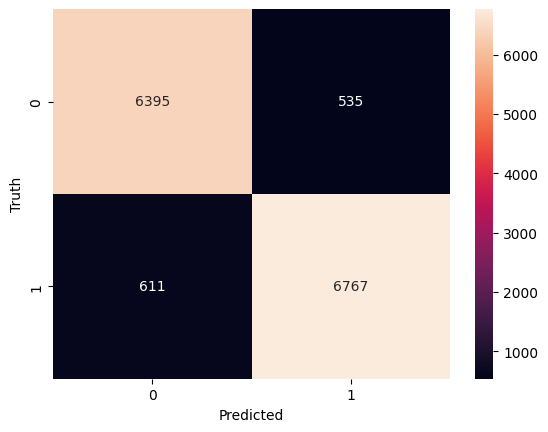

In [97]:
import seaborn as sns

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
type(model)

keras.src.engine.functional.Functional

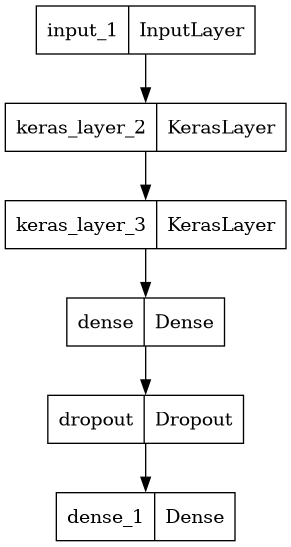

In [99]:
tf.keras.utils.plot_model(model, "my_first_model.png")

In [103]:
model.save('model_news')

In [105]:
model_2 = tf.keras.models.load_model('/kaggle/working/model_news')

In [106]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_mask': (None, 128)   0         ['input_1[0][0]']             
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [107]:
!zip -r fake_news_classifier.zip /kaggle/working/model_news

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/model_news/ (stored 0%)
  adding: kaggle/working/model_news/variables/ (stored 0%)
  adding: kaggle/working/model_news/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: kaggle/working/model_news/variables/variables.index (deflated 79%)
  adding: kaggle/working/model_news/fingerprint.pb (stored 0%)
  adding: kaggle/working/model_news/assets/ (stored 0%)
  adding: kaggle/working/model_news/assets/vocab.txt (deflated 53%)
  adding: kaggle/working/model_news/keras_metadata.pb (deflated 86%)
  adding: kaggle/working/model_news/saved_model.pb (deflated 92%)


In [108]:
model.save('news_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
hub.__version__

'0.16.1'

In [ ]:
model_2 = tf.keras.models.load_model('/kaggle/working/news_model.h5')